<div class="alert alert-info"><h1> Grade-Prediction Project using several approaches</h1>
<h3>1. XGBoost<br>2. RandomForest<br>3. Deep-Learning Model (Torch)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('grades.csv')
df = pd.DataFrame(data)

df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [3]:
def create_cats(x):
    if (x >= 85):
        grade_cat = 'A'
    elif (x < 85) and (x >= 70):
        grade_cat = 'B'
    elif (x < 70) and (x >= 55):
        grade_cat = 'C'
    elif (x < 55) and (x >= 40):
        grade_cat = 'D'
    else:
        grade_cat = 'F'

    return grade_cat

df['grade_cat'] = df['Grades'].apply(create_cats)

In [4]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,grade_cat
0,0.95822,3.4,8.2,53.0,47.0,D
1,0.85566,3.2,5.9,55.0,35.0,F
2,0.68025,3.2,9.3,41.0,32.0,F
3,0.25936,3.2,8.2,47.0,34.0,F
4,0.60447,3.8,10.0,75.0,33.0,F


<div class="alert alert-info"><h3> Distribution of Grades

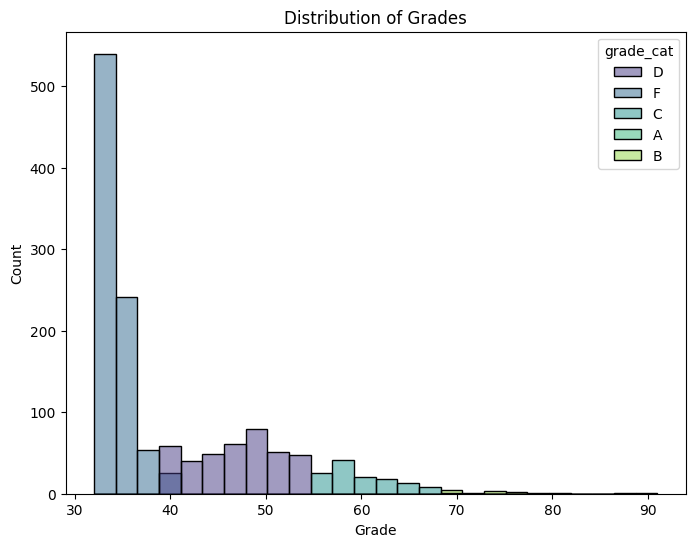

In [7]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x='Grades',hue='grade_cat', palette='viridis')
plt.title("Distribution of Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

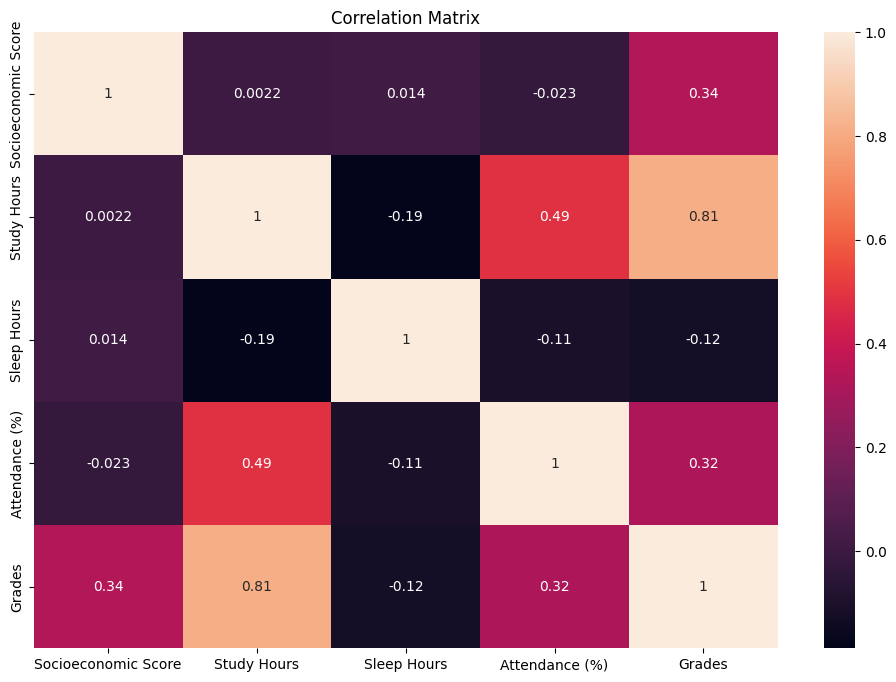

In [8]:
corr = df.drop(columns=['grade_cat']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

<div class="alert alert-info"> <h3>Find Correlation:</h3>
<ul>
<li><b>high</b> Correlation between Attendance and Grades (81%)
<li><b>medium</b> Correlation between Grades and Socio-economic Score and Attendance (34 / 32%)
<li><b>high</b> Correlation between Attendance and Study Hours (49%)

In [12]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X = df.drop(columns=['Grades', 'grade_cat'], axis=1)
y = df['Grades']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



model = XGBRegressor()

<div class="alert alert-info"><h3>Generiere optimale Modellparameter für XGBoost Model

In [13]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

def optimize_xgboost(X_train, y_train, param_grid=None, cv=5, scoring='neg_mean_squared_error', verbose=1):
    """
    Optimiert die Hyperparameter eines XGBoost-Modells mit GridSearchCV.
    
    Args:
        X_train (pd.DataFrame or np.ndarray): Trainingsdaten (Features).
        y_train (pd.Series or np.ndarray): Trainingsdaten (Labels).
        param_grid (dict): Ein Dictionary mit den zu durchsuchenden Hyperparameterwerten.
        cv (int): Anzahl der Cross-Validation-Folds. Standard: 5.
        scoring (str): Scoring-Methode für die Optimierung. Standard: 'neg_mean_squared_error'.
        verbose (int): Verbositätslevel für GridSearchCV. Standard: 1.
    
    Returns:
        dict: Die besten Hyperparameter.
        GridSearchCV: Das vollständige GridSearchCV-Objekt.
    """
    if param_grid is None:
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'reg_alpha': [0, 0.1, 1],
            'reg_lambda': [1, 2, 5],
        }

    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        verbose=verbose,
        n_jobs=-1
    )

    print("Starting Grid Search...")
    grid_search.fit(X_train, y_train)

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")

    return grid_search.best_params_, grid_search


best_params, grid_obj = optimize_xgboost(X_train, y_train)

best_model = grid_obj.best_estimator_

Starting Grid Search...
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


c:\Users\Amin\PycharmProjects\ML\project\mlmodeling\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.8}
Best Score: -1.408798402880269


In [23]:
model = XGBRegressor(**best_params)

"params_set_2 = {\n    'colsample_bytree': 1.0, \n    'learning_rate': 0.01, \n    'max_depth': 5, \n    'n_estimators': 500, \n    'reg_alpha': 0, \n    'reg_lambda': 2, \n    'subsample': 0.8\n    }\nmodel2 = XGBRegressor(**params_set_2)"

In [27]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix


mse = mean_squared_error(y_test, y_pred)

r2_score = r2_score(y_test, y_pred)



In [26]:
print(f'MSE XGBoost: {mse}\nr2-Score: {r2_score}')

MSE XGBoost Param Set 1: 1.8105606984857154
r2-Score: 0.9773140091546947


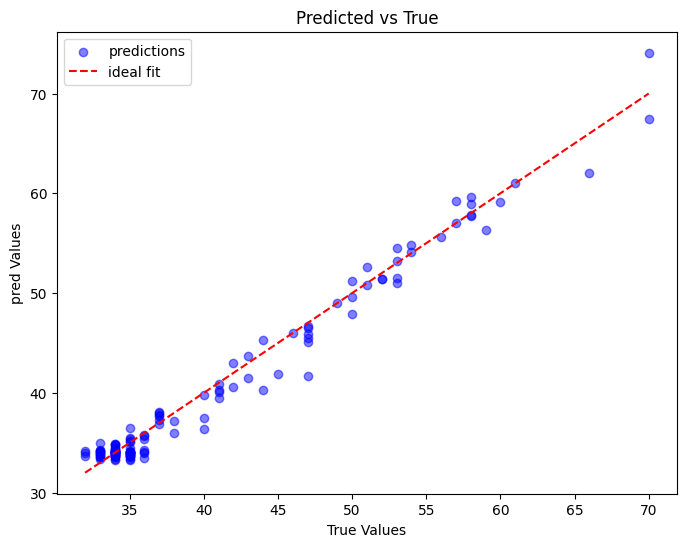

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="ideal fit")
plt.xlabel("True Values")
plt.ylabel("pred Values")
plt.title("Predicted vs True")
plt.legend()
plt.show()

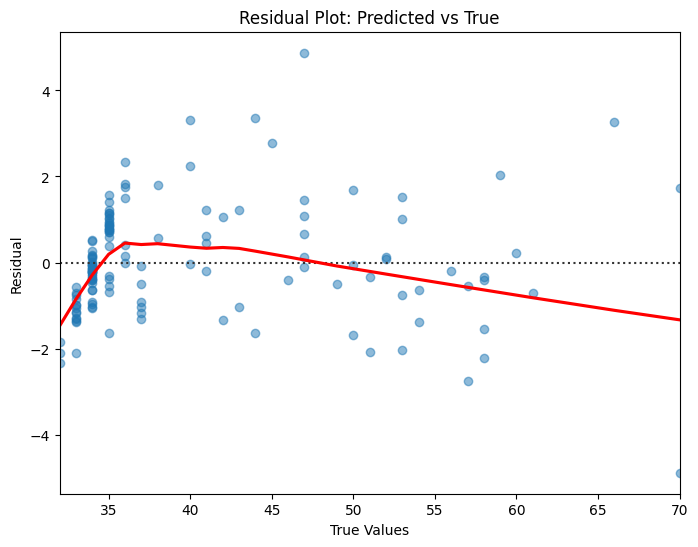

In [36]:
residual = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=residual, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Residual Plot: Predicted vs True")
plt.xlabel("True Values")
plt.ylabel("Residual")
plt.show()